In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
from imblearn.over_sampling import RandomOverSampler

In [5]:
df = pd.read_csv('datasets/daily_ithaca_data.csv').dropna()

In [26]:
df.head(50)

,date,temperature,dewpoint_temperature,relative_humidity,cloud_cover,precipitation,rain_tomorrow
0,2005-01-01,5.793333,1.602917,0.747083,0.633333,0.00,1
1,2005-01-02,0.222500,-2.469583,0.821667,0.902500,1.98,1
2,2005-01-03,4.257500,3.196667,0.927500,0.997500,5.18,1
3,2005-01-04,2.041250,1.375833,0.953333,0.997917,10.04,1
4,2005-01-05,-0.984583,-3.369167,0.839583,1.000000,3.77,1
5,2005-01-06,-2.617083,-4.100000,0.897917,1.000000,22.30,0
6,2005-01-07,-1.189583,-5.477083,0.730833,0.920000,0.00,1
7,2005-01-08,-1.250833,-3.677500,0.842083,0.997083,15.28,0
8,2005-01-09,-2.109583,-3.741667,0.887083,0.921667,0.00,1
9,2005-01-10,1.045000,-1.762500,0.817917,0.773333,1.30,1


In [6]:
df.rain_tomorrow.value_counts()

0    3629
1    2945
Name: rain_tomorrow, dtype: int64

In [7]:
resampler =  RandomOverSampler(sampling_strategy='minority', random_state=42)

In [8]:
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])

In [9]:
input_cols = ['precipitation']

In [10]:
x_train = train[input_cols]

y_train = train[['rain_tomorrow']]

In [11]:
# rebalance the data to balance the rain_tomorrow 1s and 0s
x_train_resampled, y_train_resampled = resampler.fit_resample(x_train, y_train)
y_train_resampled.value_counts()

rain_tomorrow
0                2168
1                2168
dtype: int64

In [12]:
x_test = test[input_cols]

y_test = test[['rain_tomorrow']]

In [13]:
model = LogisticRegression()  
model.fit(x_train_resampled, y_train_resampled)

c:\Users\Anchey Peng\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [14]:
model.predict(x_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
print('Score: {:.2f}'.format(model.score(x_test,y_test)*100))

Score: 59.47


<AxesSubplot:title={'center':'Probability of rain tomorrow vs rainfall'}, xlabel='precipitation', ylabel='rain_tomorrow'>

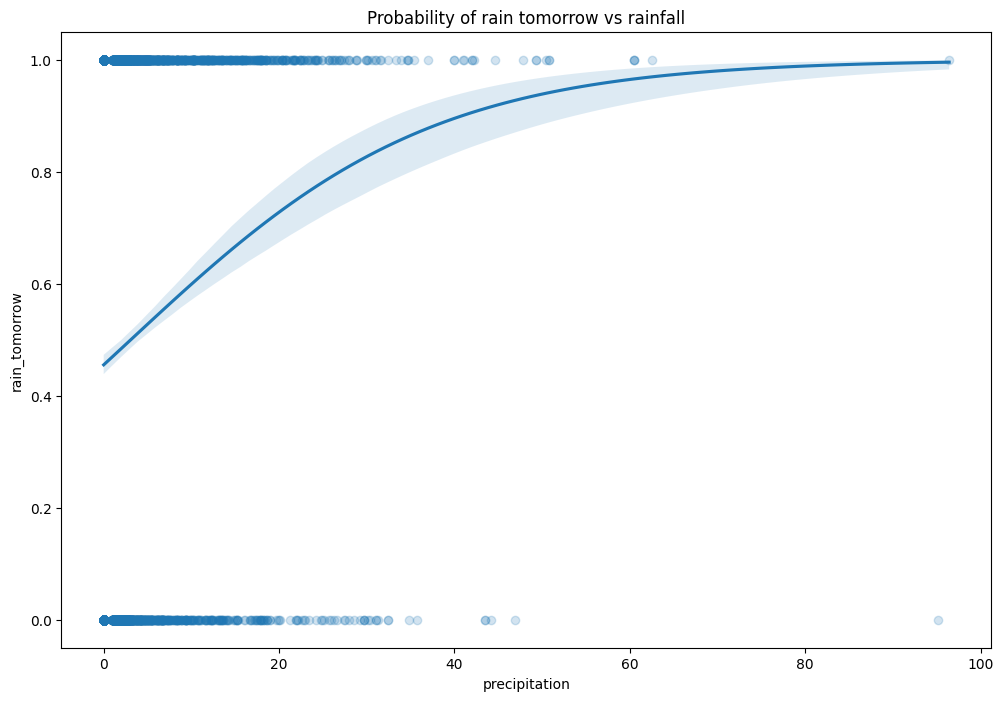

In [24]:
plt.figure(figsize=(12,8))
plt.title("Probability of rain tomorrow vs rainfall")
sns.regplot(x=x_train_resampled.precipitation, y=y_train_resampled.rain_tomorrow, logistic=True, scatter_kws={'alpha':0.2})

In [16]:
scaler = MinMaxScaler().fit(df[['precipitation', 'rain_tomorrow']])

In [17]:
train_scaled, validate_scaled, test_scaled = \
              np.split(df[['precipitation', 'rain_tomorrow']].sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])
              
train_scaled[['precipitation', 'rain_tomorrow']] = scaler.transform(train_scaled[['precipitation', 'rain_tomorrow']])
validate_scaled[['precipitation', 'rain_tomorrow']] = scaler.transform(validate_scaled[['precipitation', 'rain_tomorrow']])
test_scaled[['precipitation', 'rain_tomorrow']] = scaler.transform(test_scaled[['precipitation', 'rain_tomorrow']])

In [18]:
train_scaled, validate_scaled, test_scaled = \
              np.split(df[['precipitation', 'rain_tomorrow']].sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])
              
train_scaled[['precipitation']] = scaler.fit_transform(train_scaled[['precipitation']])
validate_scaled[['precipitation']] = scaler.fit_transform(validate_scaled[['precipitation']])
test_scaled[['precipitation']] = scaler.fit_transform(test_scaled[['precipitation']])

In [19]:
x_train_scaled = train_scaled[['precipitation']]
y_train_scaled = train_scaled[['rain_tomorrow']]

In [20]:
# rebalance the data to balance the rain_tomorrow 1s and 0s
x_train_scaled_resampled, y_train_scaled_resampled = resampler.fit_resample(x_train_scaled, y_train_scaled)

In [21]:
x_test_scaled = test_scaled[['precipitation']]

y_test_scaled = test_scaled[['rain_tomorrow']]

In [22]:
model_scaled = LogisticRegression()  
model_scaled.fit(x_train_scaled_resampled, y_train_scaled_resampled)
print('Score: {:.2f}'.format(model.score(x_test_scaled,y_test_scaled)*100))

Score: 54.98


c:\Users\Anchey Peng\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:title={'center':'Probability of rain tomorrow vs rainfall'}, xlabel='precipitation', ylabel='rain_tomorrow'>

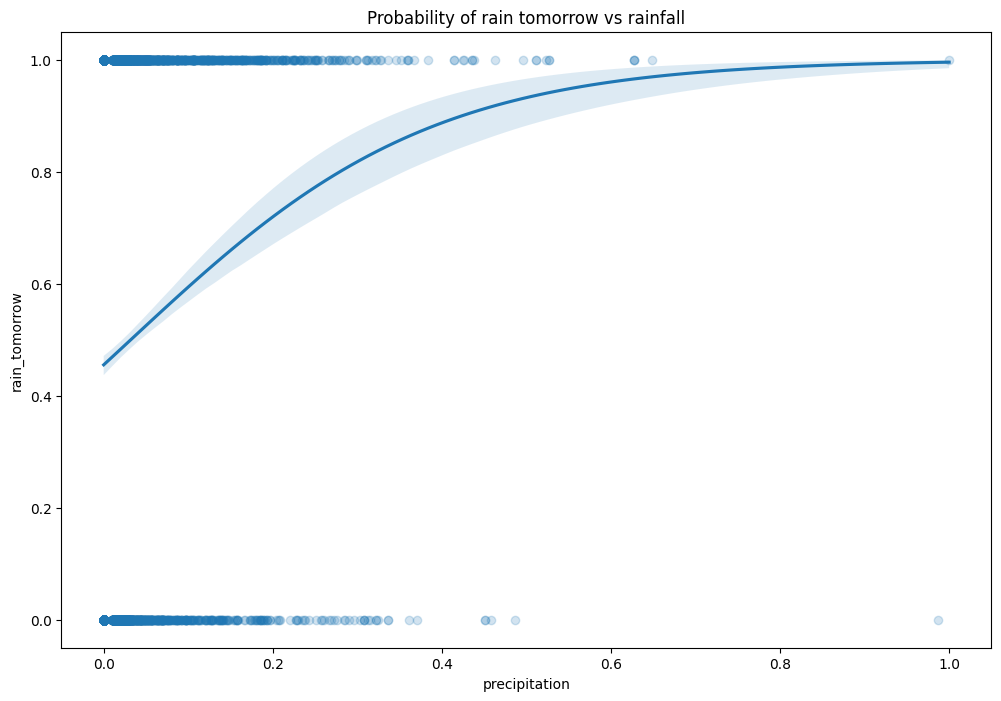

In [23]:
plt.figure(figsize=(12,8))
plt.title("Probability of rain tomorrow vs rainfall")
sns.regplot(x=x_train_scaled_resampled.precipitation, y=y_train_scaled_resampled.rain_tomorrow, logistic=True, scatter_kws={'alpha':0.2})